In [67]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%pip install pandas matplotlib

In [68]:
# Load the 2012-18 NBA Enhanced Box Score dataset
df = pd.read_csv('2012-18_teamBoxScore.csv')

# Explore dtype of variables
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14758 entries, 0 to 14757
Columns: 123 entries, gmDate to pace
dtypes: float64(50), int64(54), object(19)
memory usage: 13.8+ MB


#Data Cleaning

In [69]:
# Examine missing values from the overall dataset
df.isna().sum()

gmDate        0
gmTime        0
seasTyp       0
offLNm1       0
offFNm1       0
             ..
opptAR        0
opptAST/TO    0
opptSTL/TO    0
poss          0
pace          0
Length: 123, dtype: int64

In [70]:
# Want to see all 119 columns in the output
# pd.set_option('display.max_columns', 130)
df.head(10)

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2012-10-30,19:00,Regular,Brothers,Tony,Smith,Michael,Workman,Haywoode,WAS,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
1,2012-10-30,19:00,Regular,Brothers,Tony,Smith,Michael,Workman,Haywoode,CLE,...,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
2,2012-10-30,20:00,Regular,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,BOS,...,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,94.9832,94.9832
3,2012-10-30,20:00,Regular,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,MIA,...,62.7083,112.6515,126.3381,-13.6866,0.4643,18.8501,1.5000,25.0000,94.9832,94.9832
4,2012-10-30,22:30,Regular,Foster,Scott,Zielinski,Gary,Dalen,Eric,DAL,...,58.6458,99.3678,108.1034,-8.7356,0.5000,18.6567,1.7143,42.8571,91.5790,91.5790
5,2012-10-30,22:30,Regular,Foster,Scott,Zielinski,Gary,Dalen,Eric,LAL,...,60.2083,108.1034,99.3678,8.7356,0.4545,17.3338,1.8333,75.0000,91.5790,91.5790
6,2012-10-31,19:00,Regular,Salvatore,Bennett,Brown,Tony,Lewis,Eric,DEN,...,58.4375,89.0099,79.4731,9.5368,0.3448,14.0362,1.1250,81.2500,94.3715,94.3715
7,2012-10-31,19:00,Regular,Salvatore,Bennett,Brown,Tony,Lewis,Eric,PHI,...,41.1458,79.4731,89.0099,-9.5368,0.3511,14.1961,0.8636,40.9091,94.3715,94.3715
8,2012-10-31,19:00,Regular,Spooner,Bill,Guthrie,David,Lindsay,Mark,IND,...,55.7292,96.1075,98.2918,-2.1843,0.3837,14.1332,1.8000,120.0000,91.5641,91.5641
9,2012-10-31,19:00,Regular,Spooner,Bill,Guthrie,David,Lindsay,Mark,TOR,...,58.5417,98.2918,96.1075,2.1843,0.4205,17.4548,1.1579,15.7895,91.5641,91.5641


In [71]:
# Checking the last line of code
df.tail(10)

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
14748,2018-04-11,08:00,Regular,Wright,Sean,Taylor,Dedric,Corbin,Sean,WAS,...,58.2636,105.1782,95.8059,9.3723,0.3793,16.0154,1.2500,37.5000,96.0275,96.0275
14749,2018-04-11,08:00,Regular,Wright,Sean,Taylor,Dedric,Corbin,Sean,ORL,...,42.6042,95.8059,105.1782,-9.3723,0.3708,12.5110,1.4167,41.6667,96.0275,96.4293
14750,2018-04-11,08:00,Regular,Williams,James,Lane,Karl,Mauer,Ken,MIL,...,107.6042,124.5350,91.0064,33.5286,0.5200,22.0681,2.9167,125.0000,104.3883,104.3883
14751,2018-04-11,08:00,Regular,Williams,James,Lane,Karl,Mauer,Ken,PHI,...,50.6250,91.0064,124.5350,-33.5286,0.3700,15.8228,1.1000,30.0000,104.3883,104.3883
14752,2018-04-11,10:30,Regular,Garretson,Ron,Mott,Rodney,Richardson,Derek,LAL,...,58.7500,98.2788,113.0207,-14.7419,0.4457,19.3798,1.5882,47.0588,101.7513,101.7513
14753,2018-04-11,10:30,Regular,Garretson,Ron,Mott,Rodney,Richardson,Derek,LAC,...,77.2917,113.0207,98.2788,14.7419,0.4421,18.2428,1.4706,47.0588,101.7513,101.7513
14754,2018-04-11,10:30,Regular,Cutler,Kevin,Kennedy,Bill,Lewis,Eric,UTA,...,67.9167,104.4268,95.2126,9.2142,0.4457,15.1951,1.9000,90.0000,97.6761,97.2708
14755,2018-04-11,10:30,Regular,Cutler,Kevin,Kennedy,Bill,Lewis,Eric,POR,...,54.7718,95.2126,104.4268,-9.2142,0.3667,13.5788,1.2000,33.3333,97.6761,97.6761
14756,2018-04-11,10:30,Regular,Tiven,Josh,Orr,J.T.,Foster,Scott,HOU,...,65.8333,104.3633,90.2307,14.1326,0.4471,18.0624,2.0000,54.5455,91.9864,91.6047
14757,2018-04-11,10:30,Regular,Tiven,Josh,Orr,J.T.,Foster,Scott,SAC,...,34.8548,90.2307,104.3633,-14.1326,0.3523,9.7969,0.7857,14.2857,91.9864,91.9864


In [72]:
# Removing redundant variables (i.e. all variables that represent opponent statistics) in order to get rid of duplicate data
df = df[["gmDate", "gmTime", "teamRslt", "seasTyp", "teamAbbr", "teamConf", "teamDiv", "teamLoc", "teamDayOff", "teamPTS", "teamAST",	"teamTO",	"teamSTL",	"teamBLK",	"teamPF", "teamFGA", "teamFGM", "teamFG%",
         "team2PA", "team2PM", "team2P%", "team3PA", "team3PM", "team3P%", "teamFTA", "teamFTM", "teamFT%", "teamORB", "teamDRB", "teamTRB", "teamPTS1", "teamPTS2",	"teamPTS3",	"teamPTS4",
         "teamPTS5",	"teamPTS6",	"teamPTS7",	"teamPTS8"]]

In [73]:
# get descriptive statistics after removing the redundant variables
df.describe()

,teamDayOff,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,...,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8
count,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,...,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.00000
mean,1.939897,102.293332,22.388535,14.365700,7.751592,4.862990,20.129286,84.100556,38.210394,0.455423,...,32.621222,43.164860,25.616140,25.675634,25.247391,25.030424,0.608416,0.092492,0.014026,0.00393
std,1.070836,12.222512,5.076511,3.904475,2.924281,2.577089,4.336582,7.259023,5.024314,0.055207,...,5.344794,6.472631,5.680311,5.678342,5.729637,5.763925,2.594583,1.022441,0.375081,0.24884
min,0.000000,58.000000,6.000000,2.000000,0.000000,0.000000,5.000000,60.000000,19.000000,0.270000,...,12.000000,17.000000,7.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,94.000000,19.000000,12.000000,6.000000,3.000000,17.000000,79.000000,35.000000,0.417600,...,29.000000,39.000000,22.000000,22.000000,21.000000,21.000000,0.000000,0.000000,0.000000,0.00000
50%,2.000000,102.000000,22.000000,14.000000,8.000000,5.000000,20.000000,84.000000,38.000000,0.454500,...,32.000000,43.000000,25.000000,26.000000,25.000000,25.000000,0.000000,0.000000,0.000000,0.00000
75%,2.000000,110.000000,26.000000,17.000000,10.000000,6.000000,23.000000,89.000000,42.000000,0.493700,...,36.000000,47.000000,29.000000,29.000000,29.000000,29.000000,0.000000,0.000000,0.000000,0.00000
max,11.000000,149.000000,47.000000,31.000000,21.000000,18.000000,42.000000,129.000000,58.000000,0.684200,...,56.000000,81.000000,49.000000,47.000000,51.000000,49.000000,22.000000,21.000000,17.000000,20.00000


# All 30 Teams Data Analysis

In [74]:
# Calculate the average percentages for offensive statistics for each team in teamAbbr
avg_percentages_offense = df.groupby('teamAbbr')[['teamFG%', 'team2P%', 'team3P%', 'teamFT%']].mean().round(3)

# Display the average percentages
print(avg_percentages_offense)

          teamFG%  team2P%  team3P%  teamFT%
teamAbbr                                    
ATL         0.458    0.505    0.362    0.760
BKN         0.451    0.495    0.348    0.759
BOS         0.449    0.492    0.348    0.781
CHA         0.437    0.472    0.345    0.767
CHI         0.440    0.470    0.351    0.779
CLE         0.457    0.503    0.363    0.753
DAL         0.455    0.499    0.359    0.782
DEN         0.458    0.501    0.350    0.745
DET         0.445    0.482    0.341    0.702
GS          0.481    0.523    0.394    0.780
HOU         0.459    0.530    0.357    0.739
IND         0.453    0.486    0.358    0.773
LAC         0.474    0.523    0.361    0.726
LAL         0.445    0.486    0.345    0.741
MEM         0.449    0.480    0.343    0.772
MIA         0.473    0.519    0.358    0.746
MIL         0.460    0.493    0.358    0.755
MIN         0.456    0.491    0.334    0.782
NO          0.459    0.494    0.361    0.767
NY          0.447    0.483    0.357    0.778
OKC       

In [75]:
# Calculate the averages for defensive statistics for each team in teamAbbr
avg_defense_stats = df.groupby('teamAbbr')[['teamAST', 'teamSTL', 'teamBLK']].mean().round(3)

# Display the averages
print(avg_defense_stats)

          teamAST  teamSTL  teamBLK
teamAbbr                           
ATL        24.683    8.425    4.695
BKN        21.593    7.348    4.370
BOS        23.363    7.941    4.210
CHA        21.258    6.734    5.205
CHI        22.705    7.037    5.039
CLE        22.116    7.122    3.941
DAL        22.486    7.667    4.256
DEN        23.620    7.778    5.049
DET        21.183    7.441    4.291
GS         26.978    8.341    5.921
HOU        22.630    8.673    4.874
IND        21.297    7.666    5.057
LAC        23.492    8.297    4.976
LAL        21.713    7.453    4.652
MEM        21.325    8.185    4.577
MIA        21.697    7.815    5.325
MIL        23.073    8.272    5.518
MIN        22.939    8.309    4.266
NO         22.675    7.415    5.600
NY         21.028    7.077    4.831
OKC        21.506    8.035    5.882
ORL        22.283    7.474    4.549
PHI        22.919    8.569    5.144
PHO        20.579    7.976    4.626
POR        21.478    6.563    4.720
SA         24.299    7.967  

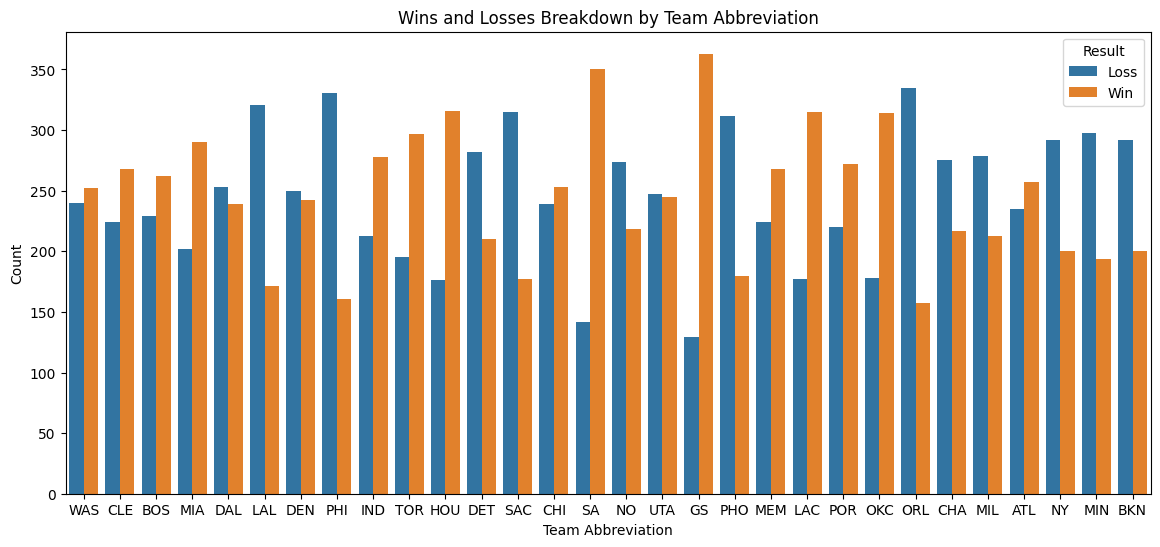

In [76]:
# Create a stacked bar chart for wins and losses by team abbreviation (showing the wins and losses for each of the 30 teams)
plt.figure(figsize=(14, 6))
sns.countplot(x='teamAbbr', hue='teamRslt', data=df)
plt.title('Wins and Losses Breakdown by Team Abbreviation')
plt.xlabel('Team Abbreviation')
plt.ylabel('Count')
plt.legend(title='Result', loc='upper right')
plt.show()

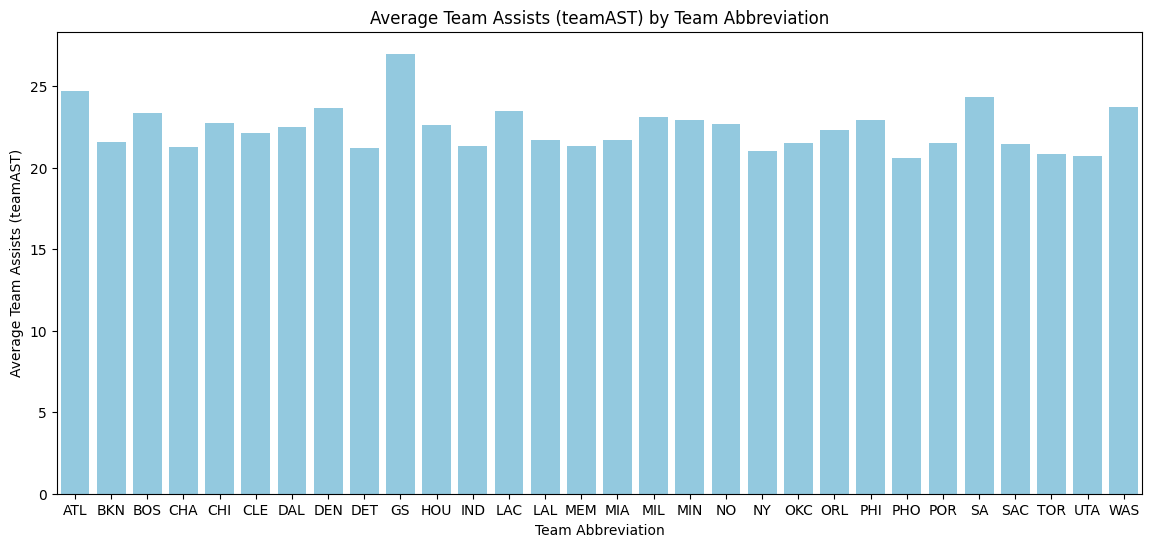

In [77]:
# Calculate the average teamAST for each team in teamAbbr
# I believe that Assists is one of the most important Offensive Statistics and wanted to see each teams averages over six year span of the data
# In order to interpret input teamAbbr (the error I kept receiving), I utilized Google and it provided me the code for adding .reset_index()
avg_team_ast = df.groupby('teamAbbr')['teamAST'].mean().reset_index()

# Create a stacked bar chart
plt.figure(figsize=(14, 6))
sns.barplot(x='teamAbbr', y='teamAST', data=avg_team_ast, color='skyblue')
plt.title('Average Team Assists (teamAST) by Team Abbreviation')
plt.xlabel('Team Abbreviation')
plt.ylabel('Average Team Assists (teamAST)')
plt.show()

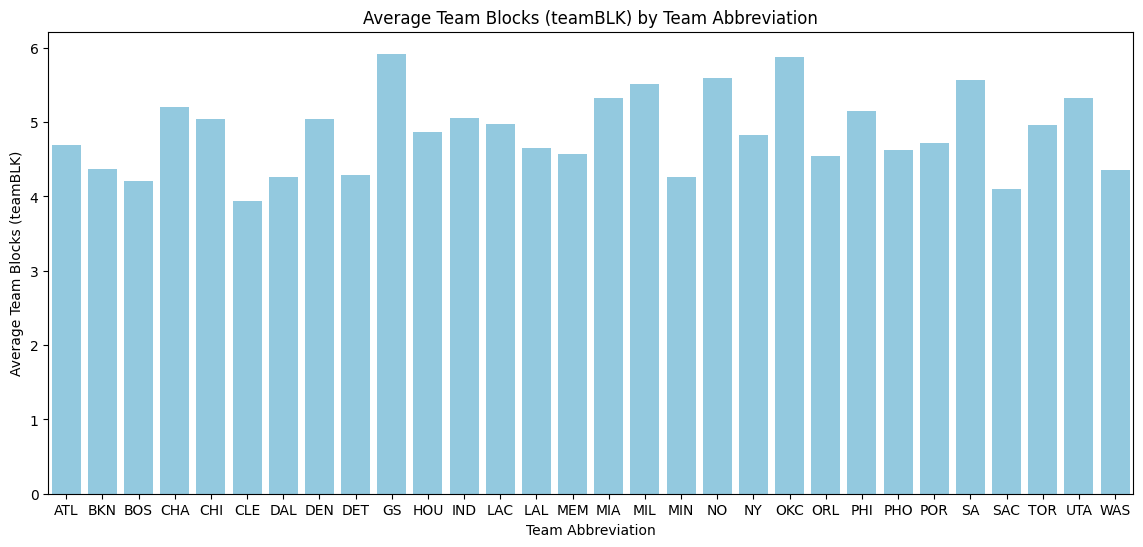

In [78]:
# Calculate the average teamBLK for each team in teamAbbr
# I believe that Blocks is one of the most important Defensive Statistics and wanted to see each teams averages over six year span of the data
# In order to interpret input teamAbbr (the error I kept receiving), I utilized Google and it provided me the code for adding .reset_index()
avg_team_blk = df.groupby('teamAbbr')['teamBLK'].mean().reset_index()

# Create a stacked bar chart
plt.figure(figsize=(14, 6))
sns.barplot(x='teamAbbr', y='teamBLK', data=avg_team_blk, color='skyblue')
plt.title('Average Team Blocks (teamBLK) by Team Abbreviation')
plt.xlabel('Team Abbreviation')
plt.ylabel('Average Team Blocks (teamBLK)')
plt.show()

#Descriptive Stats for Offense

Correlation between Average Points per Game and Number of Wins: 0.628226425615159


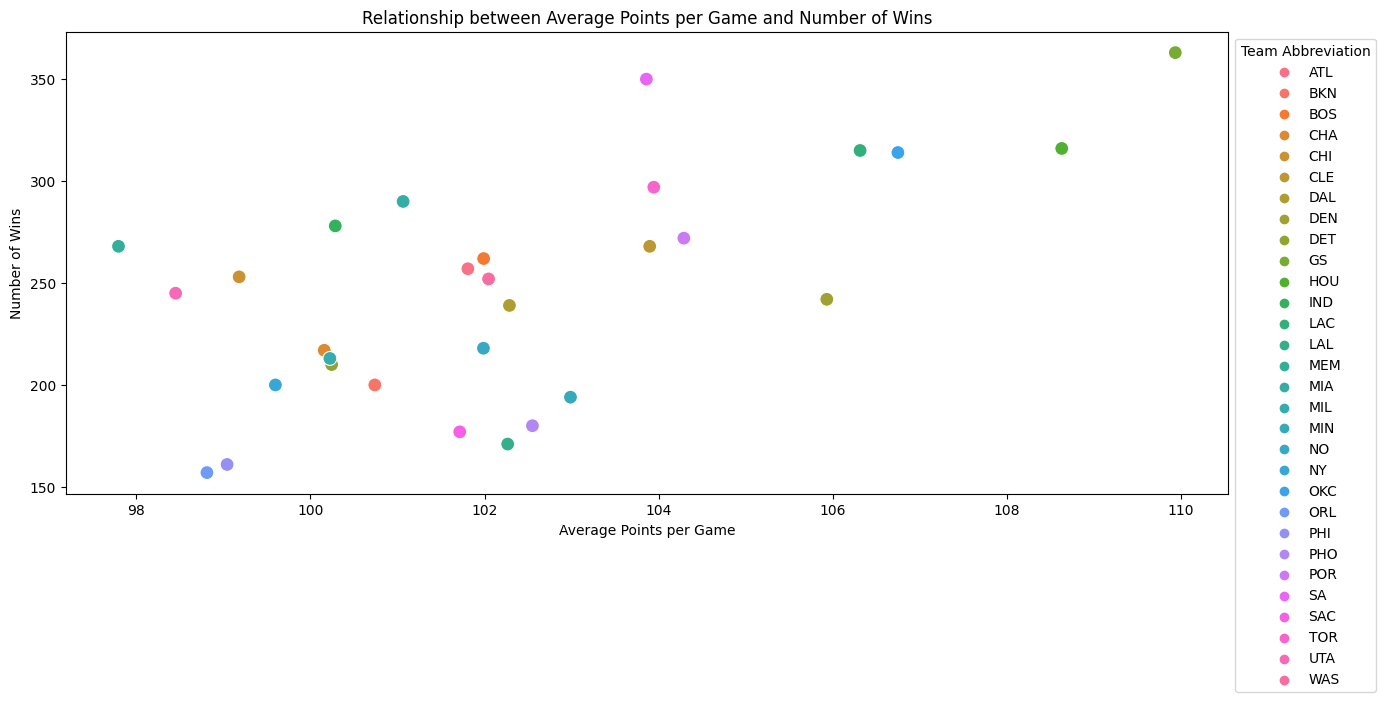

In [79]:
# Calculate the number of wins for each team in teamAbbr
# In order to interpret input teamAbbr (the error I kept receiving), I utilized Google and it provided me the code for adding .reset_index()
wins_per_team = df[df['teamRslt'] == 'Win'].groupby('teamAbbr').size().reset_index(name='num_wins')

# Calculate the average Points per game for each team in teamAbbr
avg_pts_per_game = df.groupby('teamAbbr')['teamPTS'].mean().reset_index()

# Merge the DataFrames to combine average Points and number of wins
# Googled how to merge the DataFrames since I was not sure how to do that
merged_pts_df = pd.merge(avg_pts_per_game, wins_per_team, on='teamAbbr')

# Calculate the correlation coefficient
correlation = merged_pts_df['teamPTS'].corr(merged_pts_df['num_wins'])

# Display the correlation coefficient
print(f"Correlation between Average Points per Game and Number of Wins: {correlation}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(15, 6))
# I wanted to make the initial size of the points larger so I looked up on Google how to do so and saw you use the "s = " function
scatter_plot = sns.scatterplot(x='teamPTS', y='num_wins', data=merged_pts_df, hue='teamAbbr', s = 100)
plt.title('Relationship between Average Points per Game and Number of Wins')
plt.xlabel('Average Points per Game')
plt.ylabel('Number of Wins')

# Move the legend to the right of the plot
# Originally the legend was on top of the graph, covering some data points. Used Google and saw I needed to use bbox_to_anchor
plt.legend(title='Team Abbreviation', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

Correlation between Average Offensive Rebounds per Game and Number of Wins: -0.1928239188083568


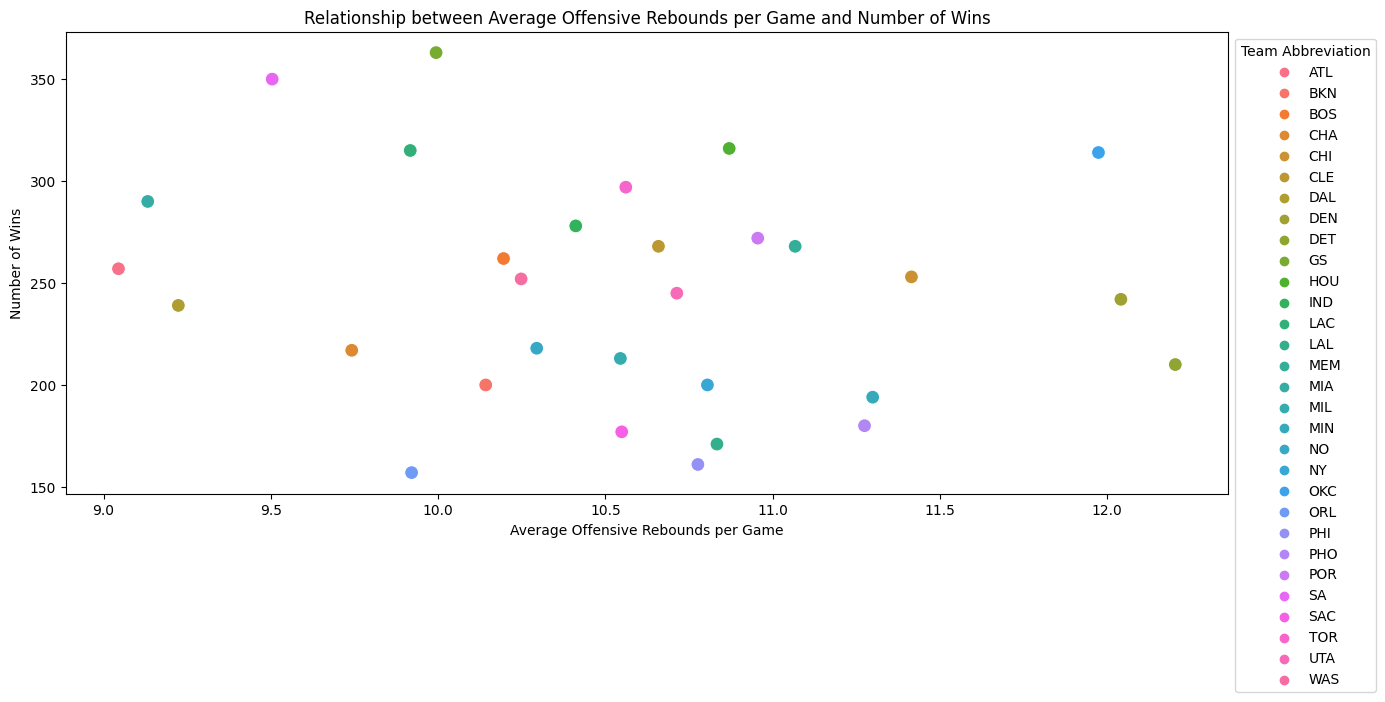

In [80]:
# Calculate the average Offensive Rebounds per game for each team in teamAbbr
# In order to interpret input teamAbbr (the error I kept receiving), I utilized Google and it provided me the code for adding .reset_index()
avg_orb_per_game = df.groupby('teamAbbr')['teamORB'].mean().reset_index()

# Merge the DataFrames to combine average Offensive Rebounds and number of wins
# Googled how to merge the DataFrames since I was not sure how to do that
merged_orb_df = pd.merge(avg_orb_per_game, wins_per_team, on='teamAbbr')

# Calculate the correlation coefficient
correlation = merged_orb_df['teamORB'].corr(merged_orb_df['num_wins'])

# Display the correlation coefficient
print(f"Correlation between Average Offensive Rebounds per Game and Number of Wins: {correlation}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(15, 6))
# I wanted to make the initial size of the points larger so I looked up on Google how to do so and saw you use the "s = " function
sns.scatterplot(x='teamORB', y='num_wins', data=merged_orb_df, hue='teamAbbr', s=100)
plt.title('Relationship between Average Offensive Rebounds per Game and Number of Wins')
plt.xlabel('Average Offensive Rebounds per Game')
plt.ylabel('Number of Wins')

# Move the legend to the right of the plot
# Originally the legend was on top of the graph, covering some data points. Used Google and saw I needed to use bbox_to_anchor
plt.legend(title='Team Abbreviation', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

Correlation between Average Assists per Game and Number of Wins: 0.42156557567845626


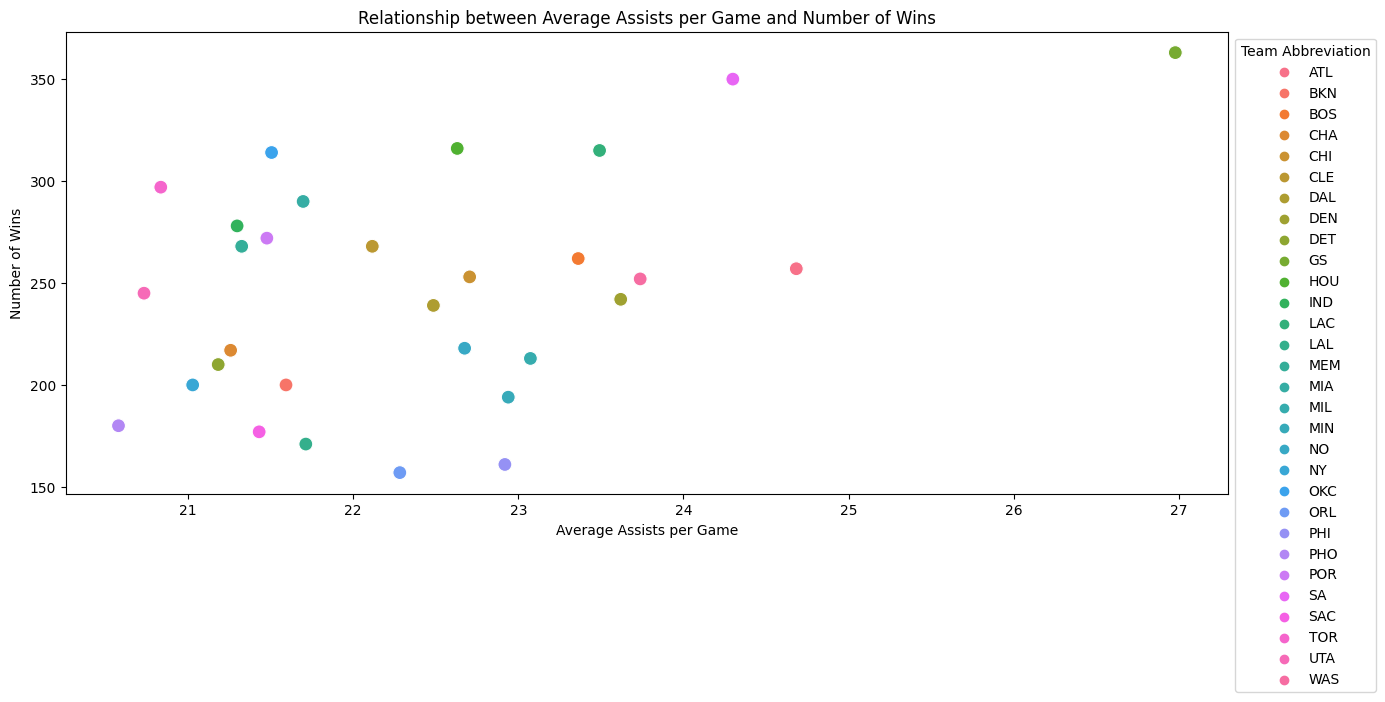

In [81]:
# Calculate the average assists per game for each team in teamAbbr
# In order to interpret input teamAbbr (the error I kept receiving), I utilized Google and it provided me the code for adding .reset_index()
avg_assists_per_game = df.groupby('teamAbbr')['teamAST'].mean().reset_index()

# Merge the DataFrames to combine average assists per game and number of wins
# Googled how to merge the DataFrames since I was not sure how to do that
merged_assists_df = pd.merge(avg_assists_per_game, wins_per_team, on='teamAbbr')

# Calculate the correlation coefficient
correlation = merged_assists_df['teamAST'].corr(merged_assists_df['num_wins'])

# Display the correlation coefficient
print(f"Correlation between Average Assists per Game and Number of Wins: {correlation}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(15, 6))
# I wanted to make the initial size of the points larger so I looked up on Google how to do so and saw you use the "s = " function
sns.scatterplot(x='teamAST', y='num_wins', data=merged_assists_df, hue='teamAbbr', s=100)
plt.title('Relationship between Average Assists per Game and Number of Wins')
plt.xlabel('Average Assists per Game')
plt.ylabel('Number of Wins')

# Move the legend to the right of the plot
# Originally the legend was on top of the graph, covering some data points. Used Google and saw I needed to use bbox_to_anchor
plt.legend(title='Team Abbreviation', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

#Descriptive Stats for Defense

Correlation between Average Steals per Game and Number of Wins: 0.2295411961414154


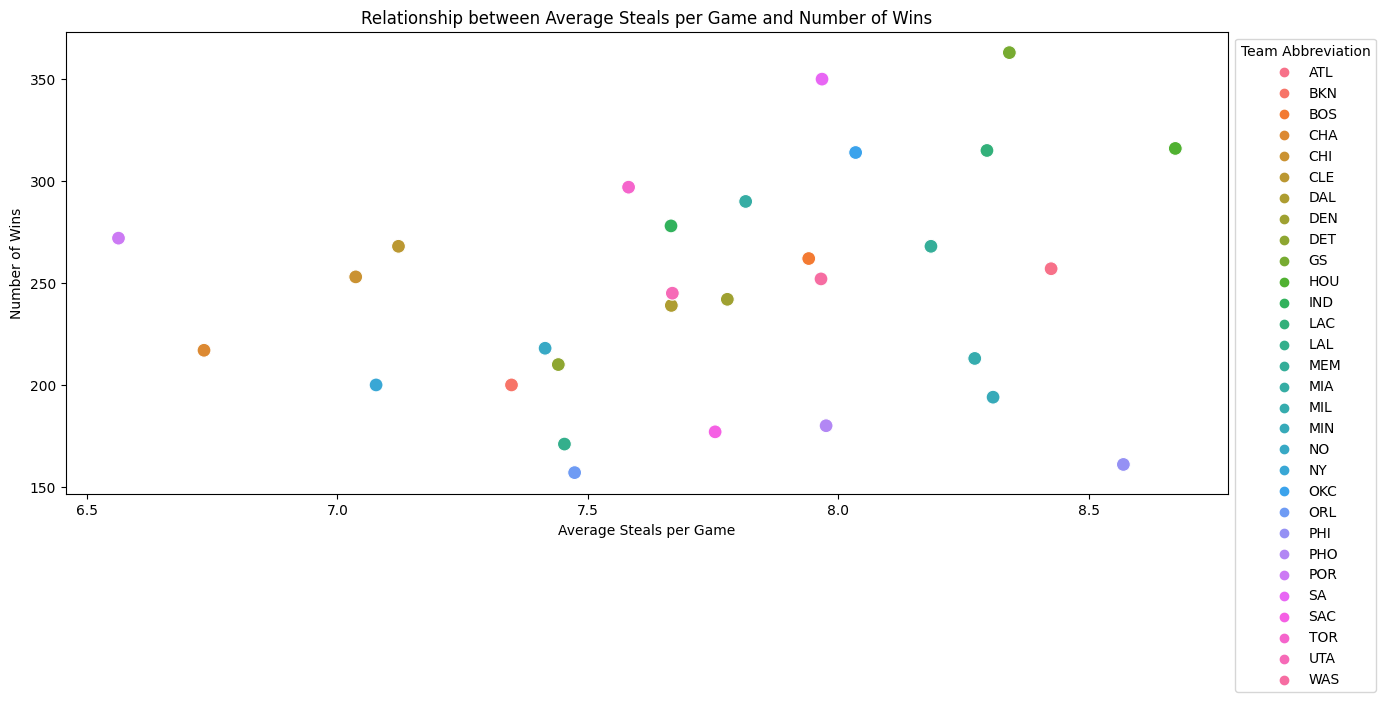

In [82]:
# Calculate the average steals per game for each team in teamAbbr
# In order to interpret input teamAbbr (the error I kept receiving), I utilized Google and it provided me the code for adding .reset_index()
avg_steals_per_game = df.groupby('teamAbbr')['teamSTL'].mean().reset_index()

# Merge the DataFrames to combine average steals per game and number of wins
# Googled how to merge the DataFrames since I was not sure how to do that
merged_steals_df = pd.merge(avg_steals_per_game, wins_per_team, on='teamAbbr')

# Calculate the correlation coefficient
correlation = merged_steals_df['teamSTL'].corr(merged_steals_df['num_wins'])

# Display the correlation coefficient
print(f"Correlation between Average Steals per Game and Number of Wins: {correlation}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(15, 6))
# I wanted to make the initial size of the points larger so I looked up on Google how to do so and saw you use the "s = " function
sns.scatterplot(x='teamSTL', y='num_wins', data=merged_steals_df, hue='teamAbbr', s=100)
plt.title('Relationship between Average Steals per Game and Number of Wins')
plt.xlabel('Average Steals per Game')
plt.ylabel('Number of Wins')

# Move the legend to the right of the plot
# Originally the legend was on top of the graph, covering some data points. Used Google and saw I needed to use bbox_to_anchor
plt.legend(title='Team Abbreviation', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

Correlation between Average Blocks per Game and Number of Wins: 0.4480822003893658


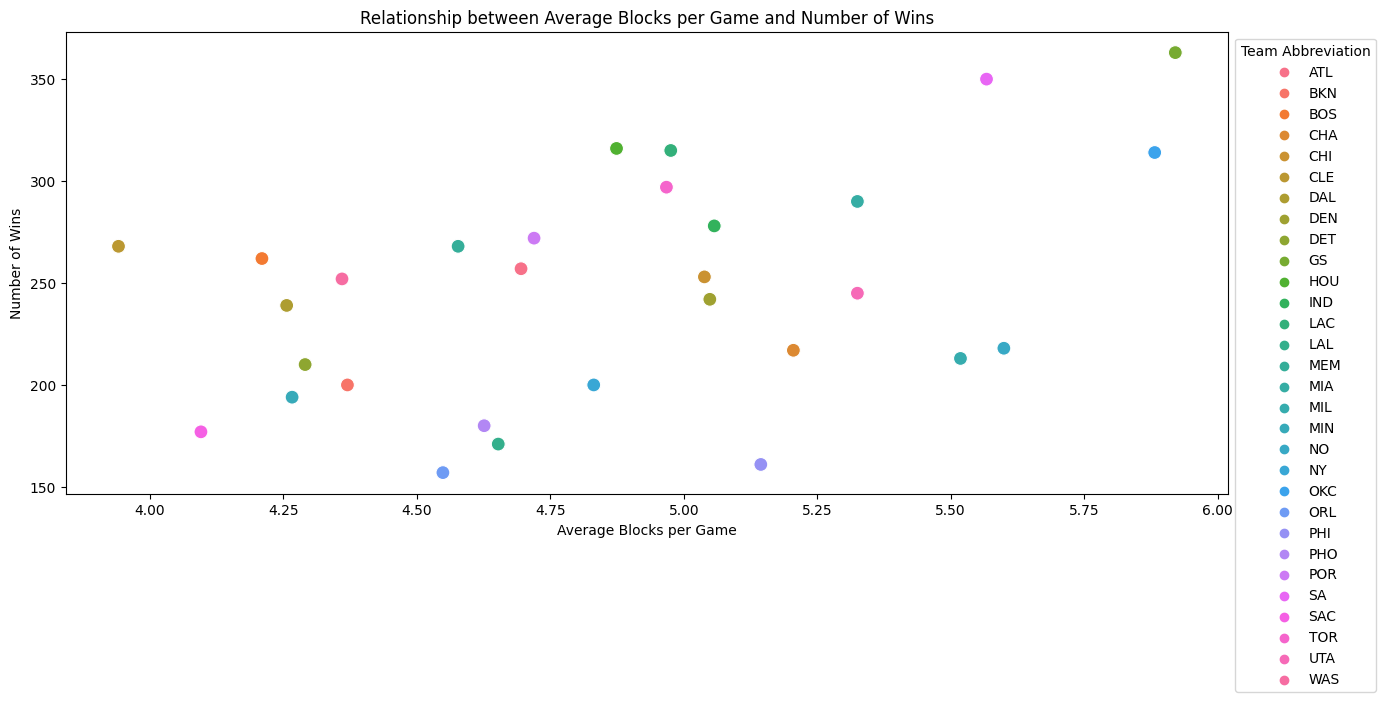

In [83]:
# Calculate the average blocks per game for each team in teamAbbr
# In order to interpret input teamAbbr (the error I kept receiving), I utilized Google and it provided me the code for adding .reset_index()
avg_blocks_per_game = df.groupby('teamAbbr')['teamBLK'].mean().reset_index()

# Merge the DataFrames to combine average blocks per game and number of wins
# Googled how to merge the DataFrames since I was not sure how to do that
merged_blocks_df = pd.merge(avg_blocks_per_game, wins_per_team, on='teamAbbr')

# Calculate the correlation coefficient
correlation = merged_blocks_df['teamBLK'].corr(merged_blocks_df['num_wins'])

# Display the correlation coefficient
print(f"Correlation between Average Blocks per Game and Number of Wins: {correlation}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(15, 6))
# I wanted to make the initial size of the points larger so I looked up on Google how to do so and saw you use the "s = " function
sns.scatterplot(x='teamBLK', y='num_wins', data=merged_blocks_df, hue='teamAbbr', s=100)
plt.title('Relationship between Average Blocks per Game and Number of Wins')
plt.xlabel('Average Blocks per Game')
plt.ylabel('Number of Wins')

# Move the legend to the right of the plot
# Originally the legend was on top of the graph, covering some data points. Used Google and saw I needed to use bbox_to_anchor
plt.legend(title='Team Abbreviation', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

Correlation between Average Defensive Rebounds per Game and Number of Wins: 0.5042647033645721


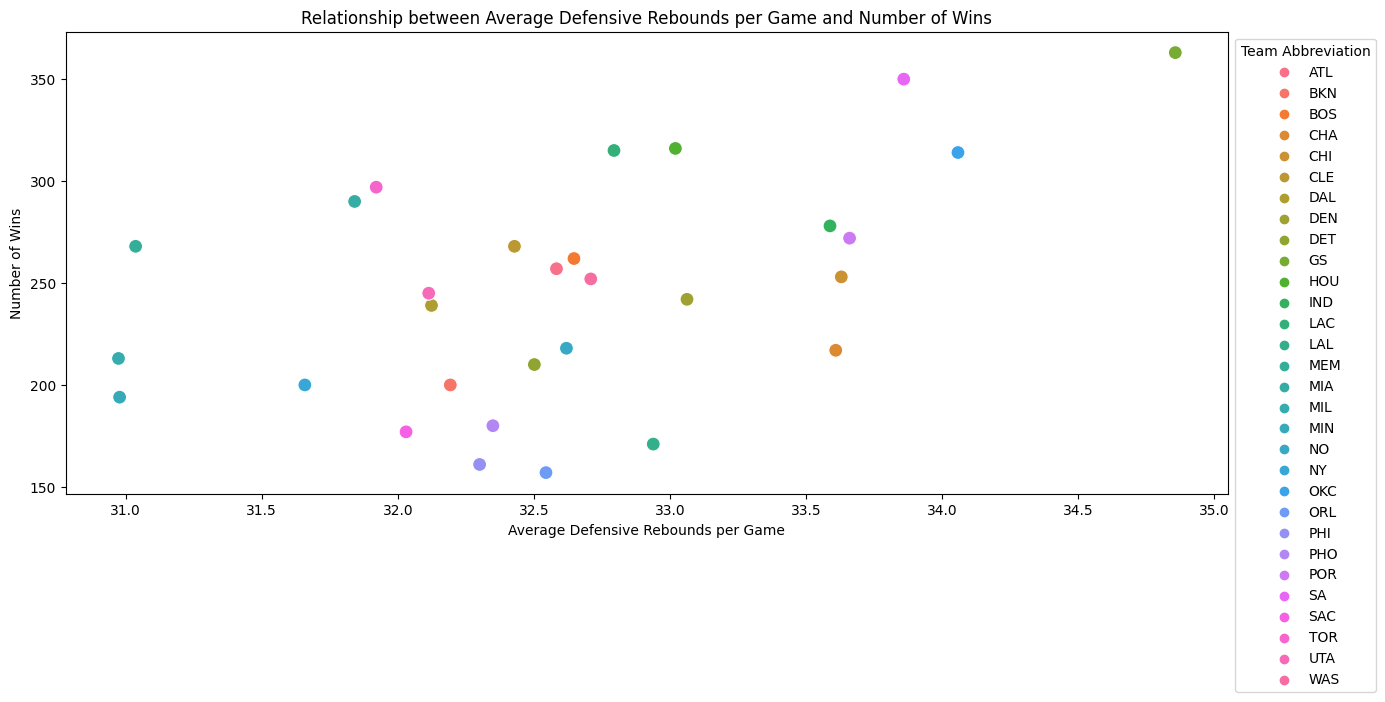

In [84]:
# Calculate the average defensive rebounds per game for each team in teamAbbr
# In order to interpret input teamAbbr (the error I kept receiving), I utilized Google and it provided me the code for adding .reset_index()
avg_defensive_rebounds_per_game = df.groupby('teamAbbr')['teamDRB'].mean().reset_index()

# Merge the DataFrames to combine average defensive rebounds per game and number of wins
# Googled how to merge the DataFrames since I was not sure how to do that
merged_drb_df = pd.merge(avg_defensive_rebounds_per_game, wins_per_team, on='teamAbbr')

# Calculate the correlation coefficient
correlation = merged_drb_df['teamDRB'].corr(merged_drb_df['num_wins'])

# Display the correlation coefficient
print(f"Correlation between Average Defensive Rebounds per Game and Number of Wins: {correlation}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(15, 6))
# I wanted to make the initial size of the points larger so I looked up on Google how to do so and saw you use the "s = " function
sns.scatterplot(x='teamDRB', y='num_wins', data=merged_drb_df, hue='teamAbbr', s=100)
plt.title('Relationship between Average Defensive Rebounds per Game and Number of Wins')
plt.xlabel('Average Defensive Rebounds per Game')
plt.ylabel('Number of Wins')

# Move the legend to the right of the plot
# Originally the legend was on top of the graph, covering some data points. Used Google and saw I needed to use bbox_to_anchor
plt.legend(title='Team Abbreviation', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

#Descriptive Stats for Turnover

Correlation between Average Turnovers per Game and Number of Wins: -0.1544329768730829


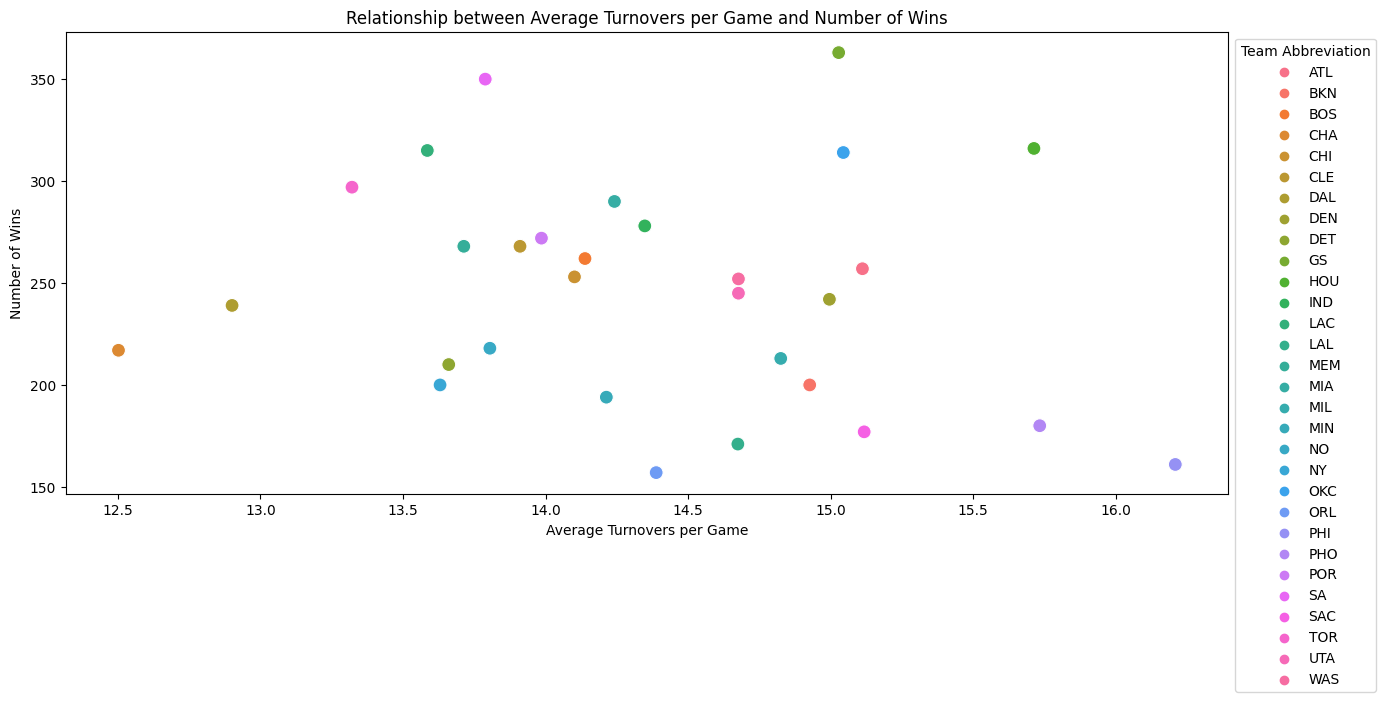

In [85]:
# Calculate the average turnovers per game for each team in teamAbbr
# In order to interpret input teamAbbr (the error I kept receiving), I utilized Google and it provided me the code for adding .reset_index()
avg_turnovers_per_game = df.groupby('teamAbbr')['teamTO'].mean().reset_index()

# Merge the DataFrames to combine average turnovers per game and number of wins
# Googled how to merge the DataFrames since Iwere not sure how to do that
merged_to_df = pd.merge(avg_turnovers_per_game, wins_per_team, on='teamAbbr')

# Calculate the correlation coefficient
correlation = merged_to_df['teamTO'].corr(merged_to_df['num_wins'])

# Display the correlation coefficient
print(f"Correlation between Average Turnovers per Game and Number of Wins: {correlation}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(15, 6))
# Iwanted to make the initial size of the points larger so Ilooked up on Google how to do so and saw you use the "s = " function
sns.scatterplot(x='teamTO', y='num_wins', data=merged_to_df, hue='teamAbbr', s=100)
plt.title('Relationship between Average Turnovers per Game and Number of Wins')
plt.xlabel('Average Turnovers per Game')
plt.ylabel('Number of Wins')

# Move the legend to the right of the plot
# Originally the legend was on top of the graph, covering some data points. Used Google and saw Ineeded to use bbox_to_anchor
plt.legend(title='Team Abbreviation', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

# 2016-2017 NBA Champions: Golden State Warriors



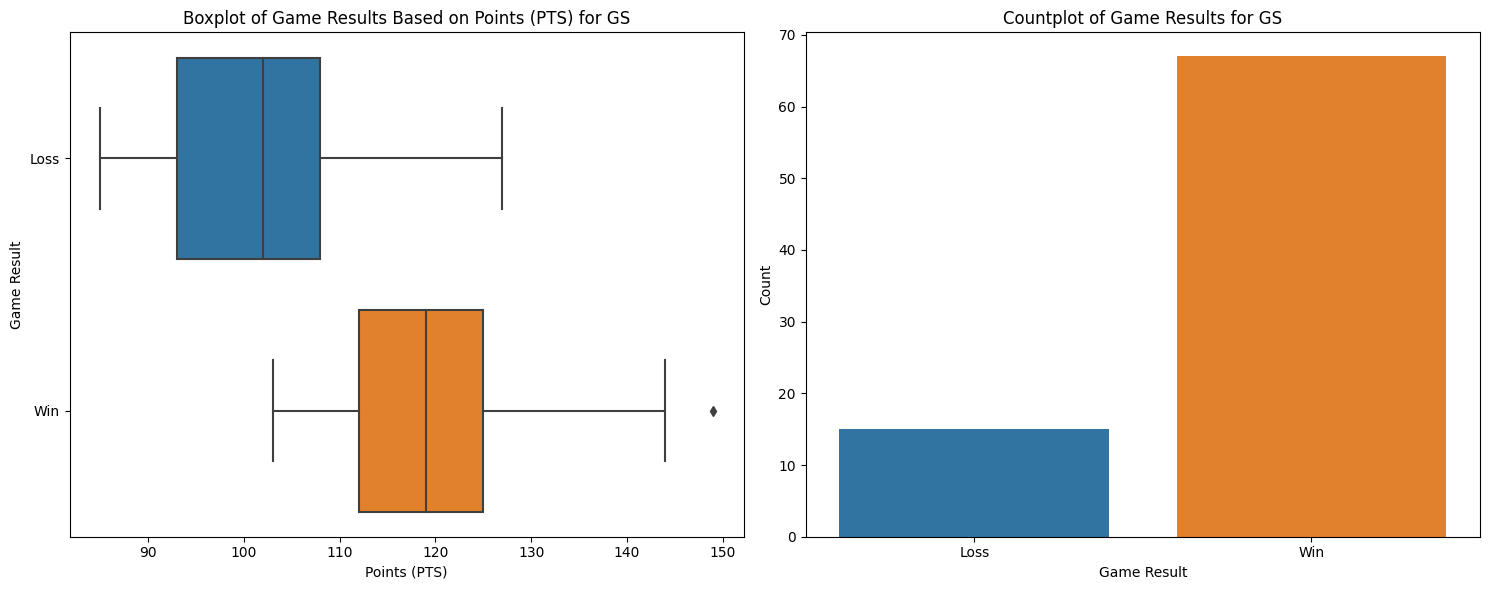

In [86]:
# Filter data for 'GS' and the specified date range
filtered_df = df[(df['teamAbbr'] == 'GS') & (df['gmDate'] >= '2016-10-25') & (df['gmDate'] <= '2017-04-12')]

# Create a figure with 2 axes on the same row: one for the boxplot and one for the countplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Create the boxplot with switched axes (x and y)
# Searched up on Google on how to filter the data to only include the variables I needed
sns.boxplot(x='teamPTS', y='teamRslt', data=filtered_df, ax=axes[0])
axes[0].set_title('Boxplot of Game Results Based on Points (PTS) for GS')
axes[0].set_xlabel('Points (PTS)')
axes[0].set_ylabel('Game Result')

# Create the countplot for game results
sns.countplot(x='teamRslt', data=filtered_df, ax=axes[1])
axes[1].set_title('Countplot of Game Results for GS')
axes[1].set_xlabel('Game Result')
axes[1].set_ylabel('Count')

# Adjust the layout to prevent overlap
plt.tight_layout()

plt.show()

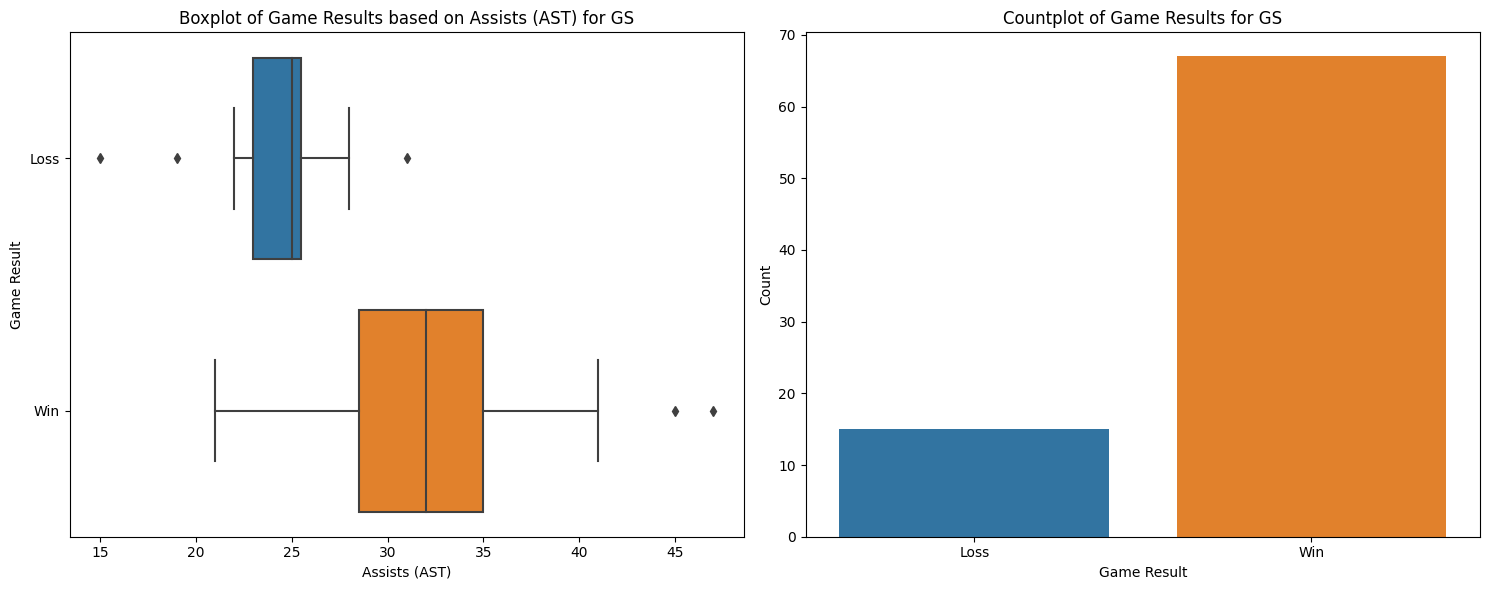

In [87]:
# Filter data for 'GS' and the specified date range
filtered_df = df[(df['teamAbbr'] == 'GS') & (df['gmDate'] >= '2016-10-25') & (df['gmDate'] <= '2017-04-12')]

# Create a figure with 2 axes on the same row: one for the boxplot and one for the countplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Create the boxplot with switched axes (x and y)
# Searched up on Google on how to filter the data to only include the variables I needed
sns.boxplot(x='teamAST', y='teamRslt', data=filtered_df, ax=axes[0])
axes[0].set_title('Boxplot of Game Results based on Assists (AST) for GS')
axes[0].set_xlabel('Assists (AST)')
axes[0].set_ylabel('Game Result')

# Create the countplot for game results
sns.countplot(x='teamRslt', data=filtered_df, ax=axes[1])
axes[1].set_title('Countplot of Game Results for GS')
axes[1].set_xlabel('Game Result')
axes[1].set_ylabel('Count')

# Adjust the layout to prevent overlap
plt.tight_layout()

plt.show()

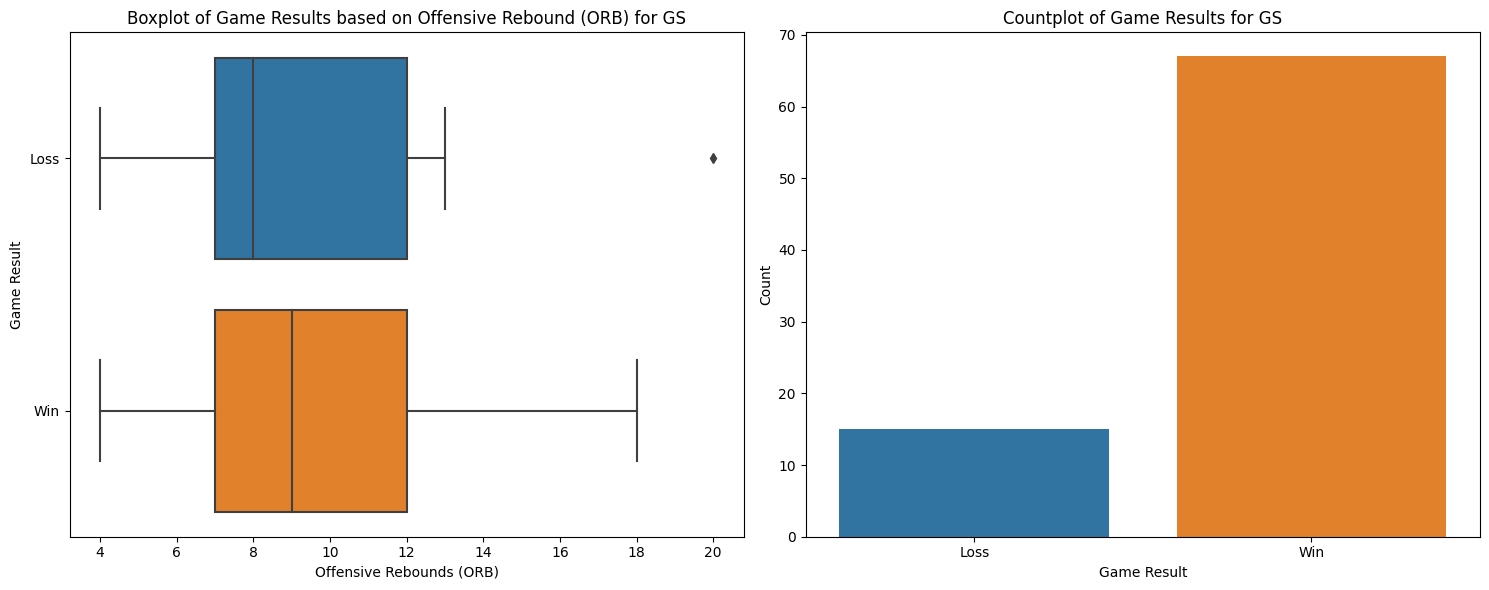

In [88]:
# Filter data for 'GS' and the specified date range
filtered_df = df[(df['teamAbbr'] == 'GS') & (df['gmDate'] >= '2016-10-25') & (df['gmDate'] <= '2017-04-12')]

# Create a figure with 2 axes on the same row: one for the boxplot and one for the countplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Create the boxplot with switched axes (x and y)
# Searched up on Google on how to filter the data to only include the variables I needed
sns.boxplot(x='teamORB', y='teamRslt', data=filtered_df, ax=axes[0])
axes[0].set_title('Boxplot of Game Results based on Offensive Rebound (ORB) for GS')
axes[0].set_xlabel('Offensive Rebounds (ORB)')
axes[0].set_ylabel('Game Result')

# Create the countplot for game results
sns.countplot(x='teamRslt', data=filtered_df, ax=axes[1])
axes[1].set_title('Countplot of Game Results for GS')
axes[1].set_xlabel('Game Result')
axes[1].set_ylabel('Count')

# Adjust the layout to prevent overlap
plt.tight_layout()

plt.show()

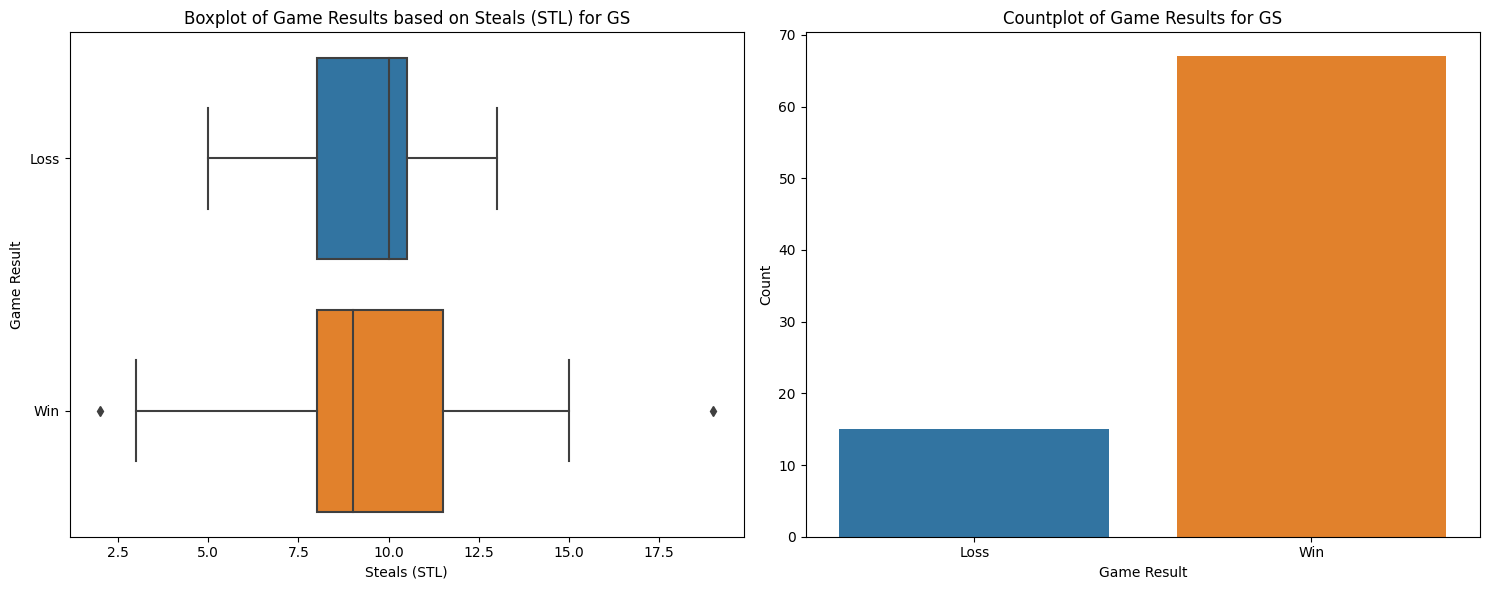

In [89]:
# Filter data for 'GS' and the specified date range
filtered_df = df[(df['teamAbbr'] == 'GS') & (df['gmDate'] >= '2016-10-25') & (df['gmDate'] <= '2017-04-12')]

# Create a figure with 2 axes on the same row: one for the boxplot and one for the countplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Create the boxplot with switched axes (x and y) for team steals (STL)
# Searched up on Google on how to filter the data to only include the variables I needed
sns.boxplot(x='teamSTL', y='teamRslt', data=filtered_df, ax=axes[0])
axes[0].set_title('Boxplot of Game Results based on Steals (STL) for GS')
axes[0].set_xlabel('Steals (STL)')
axes[0].set_ylabel('Game Result')

# Create the countplot for game results
sns.countplot(x='teamRslt', data=filtered_df, ax=axes[1])
axes[1].set_title('Countplot of Game Results for GS')
axes[1].set_xlabel('Game Result')
axes[1].set_ylabel('Count')

# Adjust the layout to prevent overlap
plt.tight_layout()

plt.show()

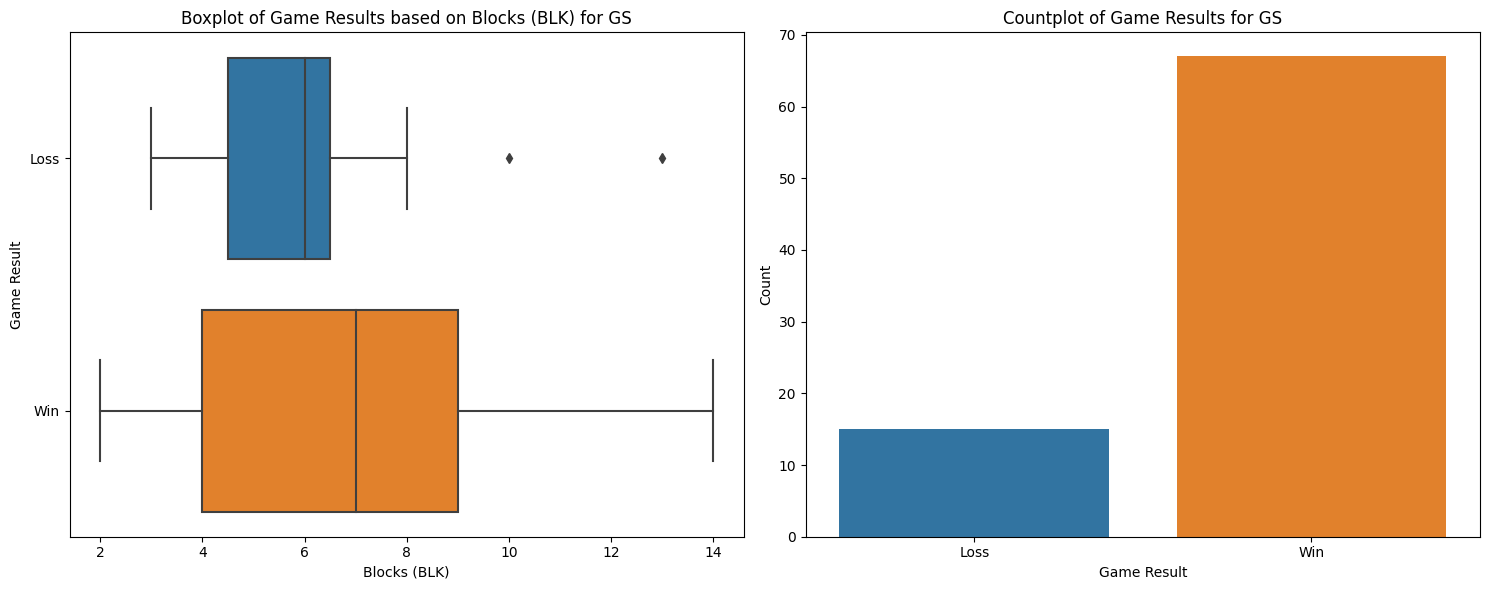

In [90]:
# Filter data for 'GS' and the specified date range
filtered_df = df[(df['teamAbbr'] == 'GS') & (df['gmDate'] >= '2016-10-25') & (df['gmDate'] <= '2017-04-12')]

# Create a figure with 2 axes on the same row: one for the boxplot and one for the countplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Create the boxplot with switched axes (x and y) for team blocks (BLK)
# Searched up on Google on how to filter the data to only include the variables I needed
sns.boxplot(x='teamBLK', y='teamRslt', data=filtered_df, ax=axes[0])
axes[0].set_title('Boxplot of Game Results based on Blocks (BLK) for GS')
axes[0].set_xlabel('Blocks (BLK)')
axes[0].set_ylabel('Game Result')

# Create the countplot for game results
sns.countplot(x='teamRslt', data=filtered_df, ax=axes[1])
axes[1].set_title('Countplot of Game Results for GS')
axes[1].set_xlabel('Game Result')
axes[1].set_ylabel('Count')

# Adjust the layout to prevent overlap
plt.tight_layout()

plt.show()

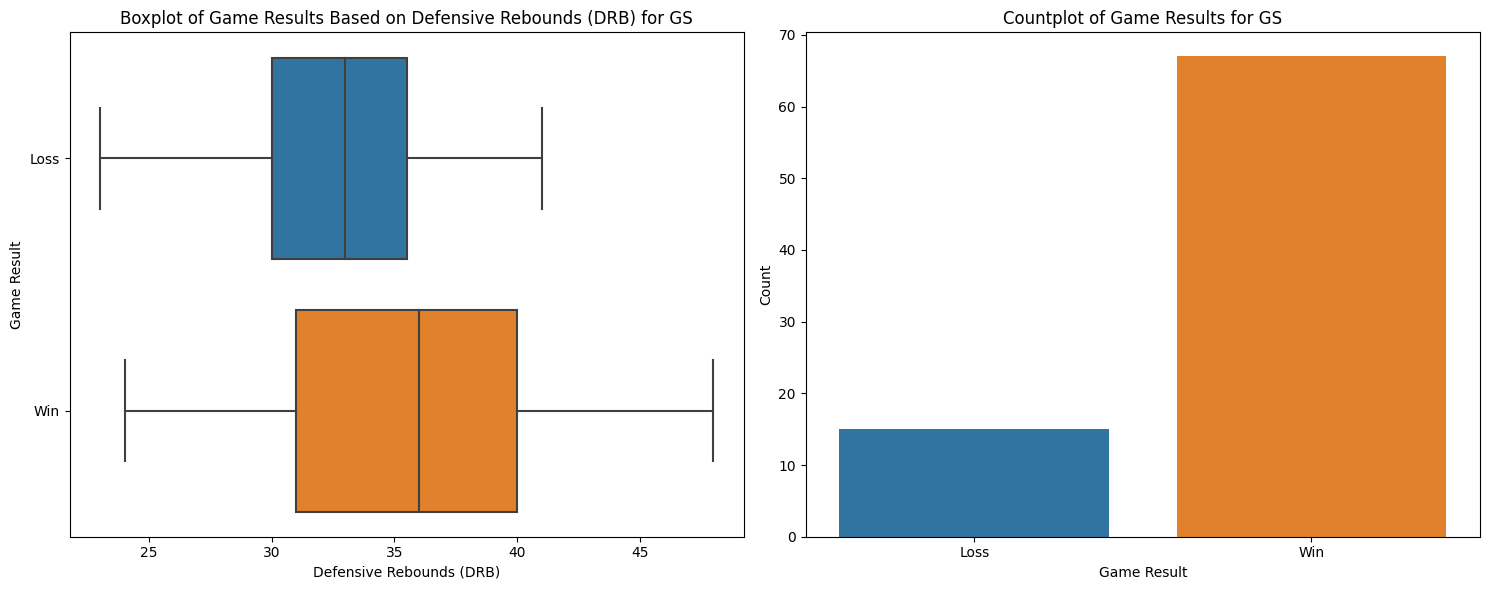

In [91]:
# Filter data for 'GS' and the specified date range
filtered_df = df[(df['teamAbbr'] == 'GS') & (df['gmDate'] >= '2016-10-25') & (df['gmDate'] <= '2017-04-12')]

# Create a figure with 2 axes on the same row: one for the boxplot and one for the countplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Create the boxplot with switched axes (x and y) for team defensive rebounds (DRB)
# Searched up on Google on how to filter the data to only include the variables I needed
sns.boxplot(x='teamDRB', y='teamRslt', data=filtered_df, ax=axes[0])
axes[0].set_title('Boxplot of Game Results Based on Defensive Rebounds (DRB) for GS')
axes[0].set_xlabel('Defensive Rebounds (DRB)')
axes[0].set_ylabel('Game Result')

# Create the countplot for game results
sns.countplot(x='teamRslt', data=filtered_df, ax=axes[1])
axes[1].set_title('Countplot of Game Results for GS')
axes[1].set_xlabel('Game Result')
axes[1].set_ylabel('Count')

# Adjust the layout to prevent overlap
plt.tight_layout()

plt.show()

#2017-2018 NBA Champions: Golden State Warriors

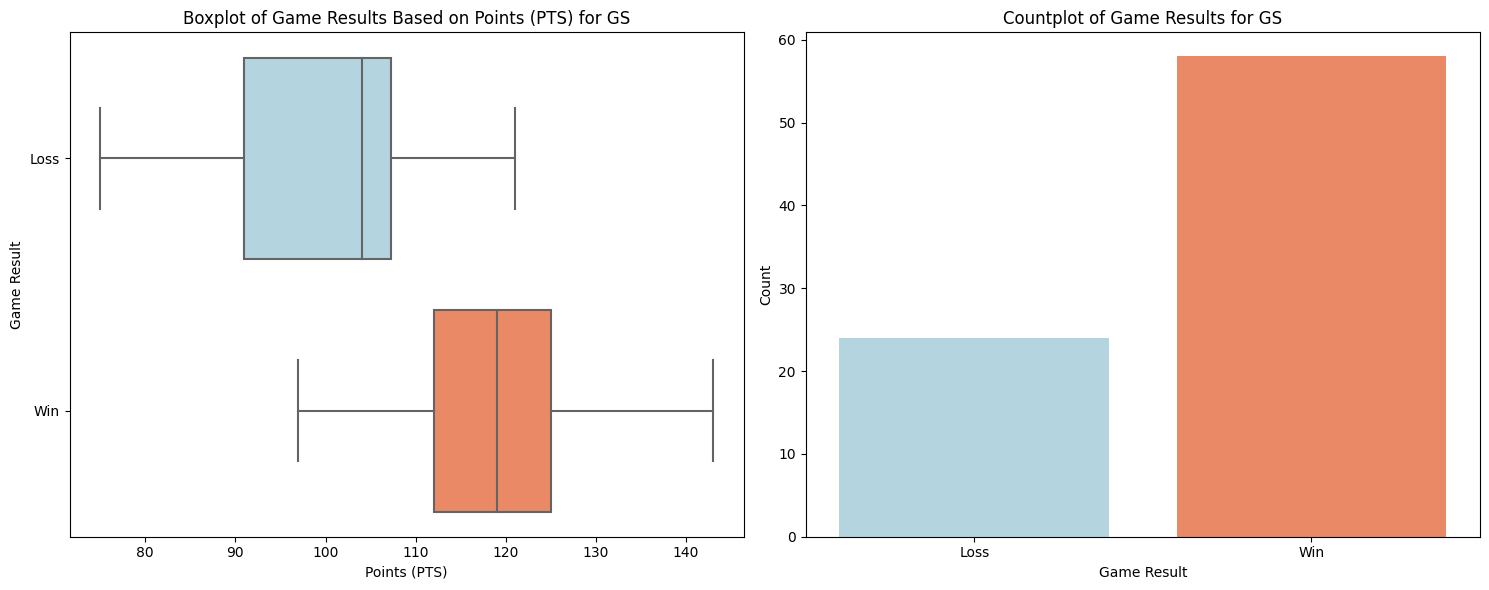

In [92]:
# Filter data for 'GS' and the specified date range
filtered_df = df[(df['teamAbbr'] == 'GS') & (df['gmDate'] >= '2017-10-17') & (df['gmDate'] <= '2018-04-11')]

# Create a custom color palette
# Googled how to change the colors of the table because I wanted to differentiate from the previous boxplots and countplots
custom_palette = {"Win": "coral", "Loss": "lightblue"}

# Create a figure with 2 axes on the same row: one for the boxplot and one for the countplot
# Searched up on Google on how to filter the data to only include the variables I needed
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Create the boxplot with switched axes (x and y) for team points (PTS) using the custom palette
sns.boxplot(x='teamPTS', y='teamRslt', data=filtered_df, ax=axes[0], palette=custom_palette)
axes[0].set_title('Boxplot of Game Results Based on Points (PTS) for GS')
axes[0].set_xlabel('Points (PTS)')
axes[0].set_ylabel('Game Result')

# Create the countplot for game results using the custom palette
sns.countplot(x='teamRslt', data=filtered_df, ax=axes[1], palette=custom_palette)
axes[1].set_title('Countplot of Game Results for GS')
axes[1].set_xlabel('Game Result')
axes[1].set_ylabel('Count')

# Adjust the layout to prevent overlap
plt.tight_layout()

plt.show()

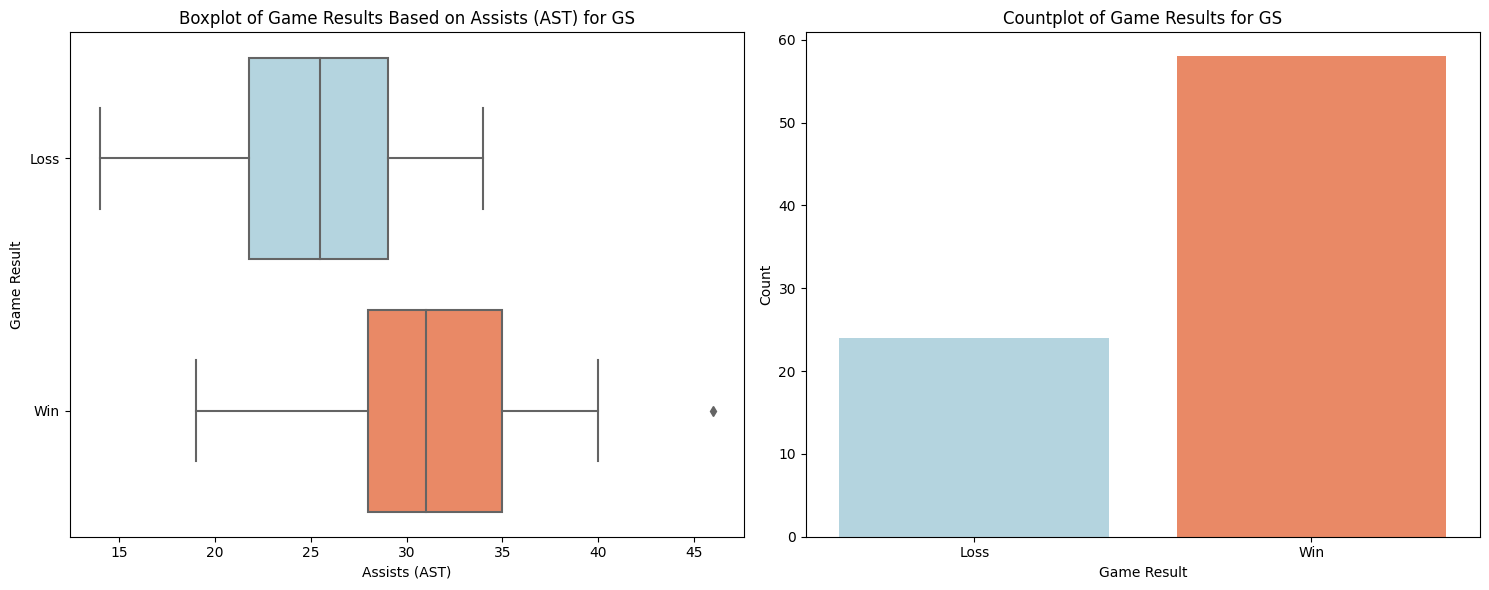

In [93]:
# Filter data for 'GS' and the specified date range
filtered_df = df[(df['teamAbbr'] == 'GS') & (df['gmDate'] >= '2017-10-17') & (df['gmDate'] <= '2018-04-11')]

# Create a custom color palette
# Googled how to change the colors of the table because I wanted to differentiate from the previous boxplots and countplots
custom_palette = {"Win": "coral", "Loss": "lightblue"}

# Create a figure with 2 axes on the same row: one for the boxplot and one for the countplot
# Searched up on Google on how to filter the data to only include the variables I needed
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Create the boxplot with switched axes (x and y)
sns.boxplot(x='teamAST', y='teamRslt', data=filtered_df, ax=axes[0], palette=custom_palette)
axes[0].set_title('Boxplot of Game Results Based on Assists (AST) for GS')
axes[0].set_xlabel('Assists (AST)')
axes[0].set_ylabel('Game Result')

# Create the countplot for game results
sns.countplot(x='teamRslt', data=filtered_df, ax=axes[1], palette=custom_palette)
axes[1].set_title('Countplot of Game Results for GS')
axes[1].set_xlabel('Game Result')
axes[1].set_ylabel('Count')

# Adjust the layout to prevent overlap
plt.tight_layout()

plt.show()

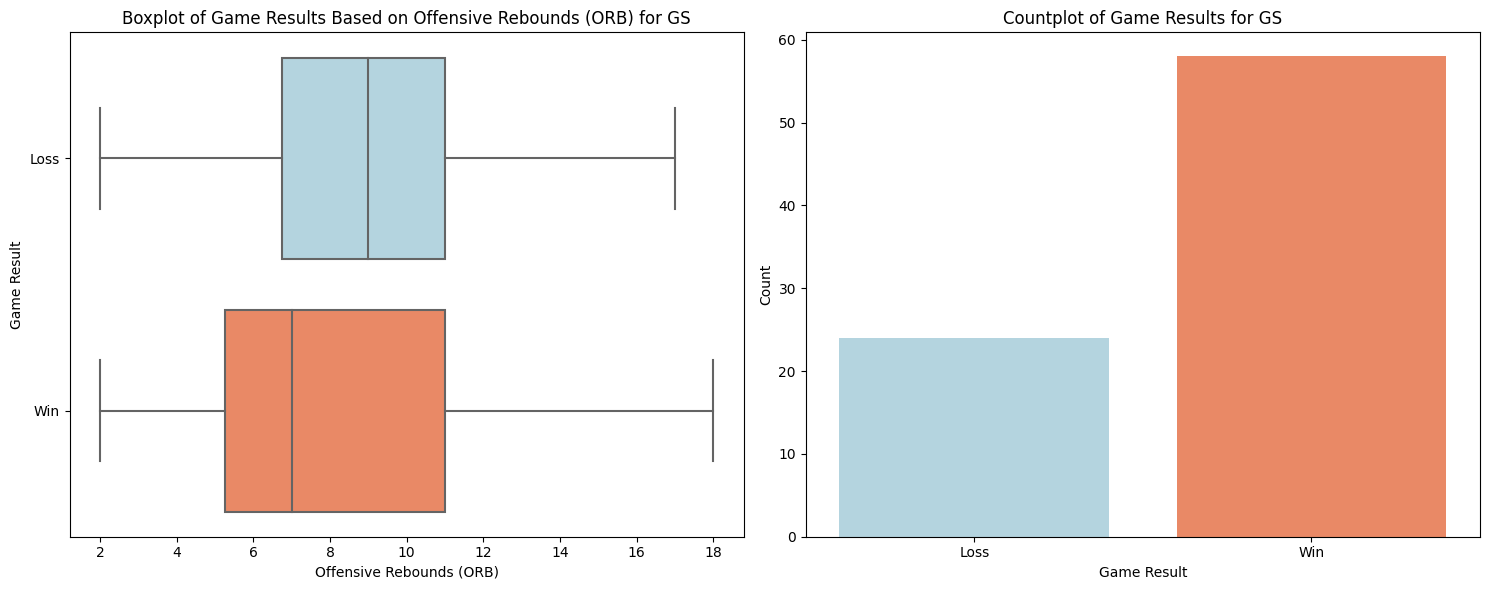

In [94]:
# Filter data for 'GS' and the specified date range
filtered_df = df[(df['teamAbbr'] == 'GS') & (df['gmDate'] >= '2017-10-17') & (df['gmDate'] <= '2018-04-11')]

# Create a custom color palette
# Googled how to change the colors of the table because I wanted to differentiate from the previous boxplots and countplots
custom_palette = {"Win": "coral", "Loss": "lightblue"}

# Create a figure with 2 axes on the same row: one for the boxplot and one for the countplot
# Searched up on Google on how to filter the data to only include the variables I needed
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Create the boxplot with switched axes (x and y) for team offensive rebounds (ORB)
sns.boxplot(x='teamORB', y='teamRslt', data=filtered_df, ax=axes[0], palette=custom_palette)
axes[0].set_title('Boxplot of Game Results Based on Offensive Rebounds (ORB) for GS')
axes[0].set_xlabel('Offensive Rebounds (ORB)')
axes[0].set_ylabel('Game Result')

# Create the countplot for game results
sns.countplot(x='teamRslt', data=filtered_df, ax=axes[1], palette=custom_palette)
axes[1].set_title('Countplot of Game Results for GS')
axes[1].set_xlabel('Game Result')
axes[1].set_ylabel('Count')

# Adjust the layout to prevent overlap
plt.tight_layout()

plt.show()

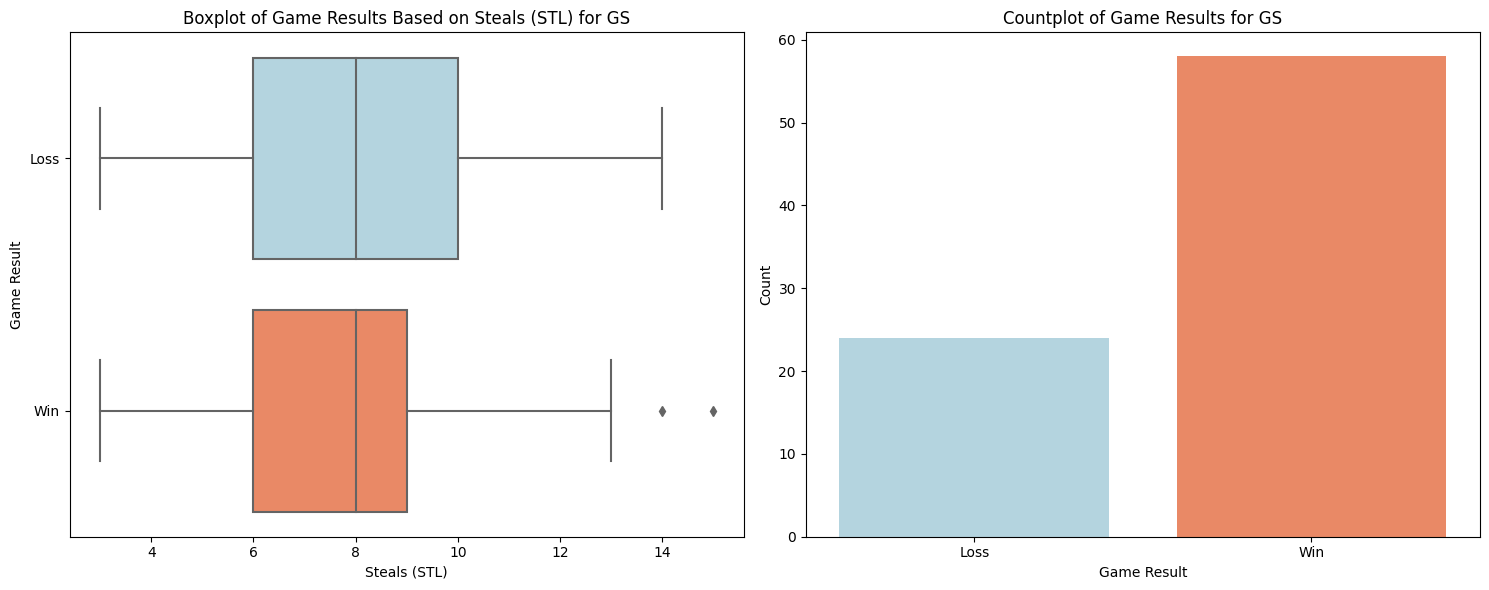

In [95]:
# Filter data for 'GS' and the specified date range
filtered_df = df[(df['teamAbbr'] == 'GS') & (df['gmDate'] >= '2017-10-17') & (df['gmDate'] <= '2018-04-11')]

# Create a custom color palette
# Googled how to change the colors of the table because I wanted to differentiate from the previous boxplots and countplots
custom_palette = {"Win": "coral", "Loss": "lightblue"}

# Create a figure with 2 axes on the same row: one for the boxplot and one for the countplot
# Searched up on Google on how to filter the data to only include the variables I needed
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Create the boxplot with switched axes (x and y) for team steals (STL)
sns.boxplot(x='teamSTL', y='teamRslt', data=filtered_df, ax=axes[0], palette=custom_palette)
axes[0].set_title('Boxplot of Game Results Based on Steals (STL) for GS')
axes[0].set_xlabel('Steals (STL)')
axes[0].set_ylabel('Game Result')

# Create the countplot for game results
sns.countplot(x='teamRslt', data=filtered_df, ax=axes[1], palette=custom_palette)
axes[1].set_title('Countplot of Game Results for GS')
axes[1].set_xlabel('Game Result')
axes[1].set_ylabel('Count')

# Adjust the layout to prevent overlap
plt.tight_layout()

plt.show()

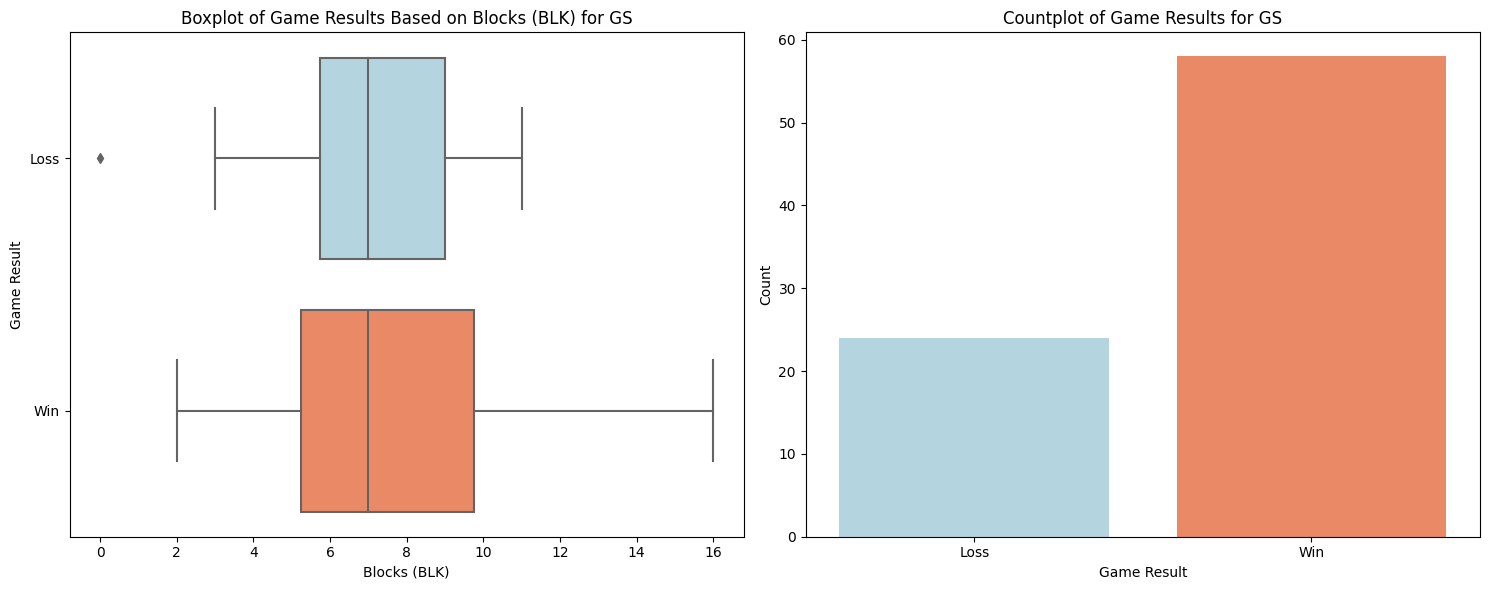

In [96]:
# Filter data for 'GS' and the specified date range
filtered_df = df[(df['teamAbbr'] == 'GS') & (df['gmDate'] >= '2017-10-17') & (df['gmDate'] <= '2018-04-11')]

# Create a custom color palette
# Googled how to change the colors of the table because I wanted to differentiate from the previous boxplots and countplots
custom_palette = {"Win": "coral", "Loss": "lightblue"}

# Create a figure with 2 axes on the same row: one for the boxplot and one for the countplot
# Searched up on Google on how to filter the data to only include the variables I needed
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Create the boxplot with switched axes (x and y) for team blocks (BLK)
sns.boxplot(x='teamBLK', y='teamRslt', data=filtered_df, ax=axes[0], palette=custom_palette)
axes[0].set_title('Boxplot of Game Results Based on Blocks (BLK) for GS')
axes[0].set_xlabel('Blocks (BLK)')
axes[0].set_ylabel('Game Result')

# Create the countplot for game results with custom colors
sns.countplot(x='teamRslt', data=filtered_df, ax=axes[1], palette=custom_palette)
axes[1].set_title('Countplot of Game Results for GS')
axes[1].set_xlabel('Game Result')
axes[1].set_ylabel('Count')

# Adjust the layout to prevent overlap
plt.tight_layout()

plt.show()

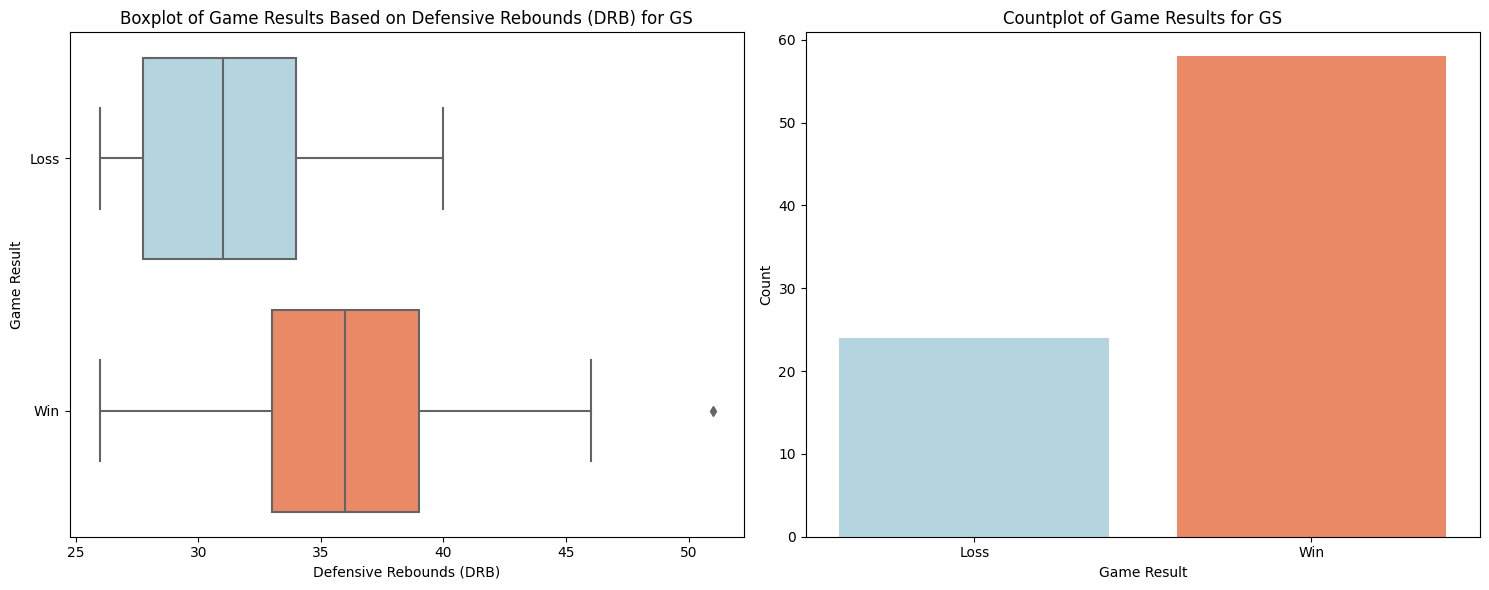

In [97]:
# Filter data for 'GS' and the specified date range
filtered_df = df[(df['teamAbbr'] == 'GS') & (df['gmDate'] >= '2017-10-17') & (df['gmDate'] <= '2018-04-11')]

# Create a custom color palette
# Googled how to change the colors of the table because I wanted to differentiate from the previous boxplots and countplots
custom_palette = {"Win": "coral", "Loss": "lightblue"}

# Create a figure with 2 axes on the same row: one for the boxplot and one for the countplot
# Searched up on Google on how to filter the data to only include the variables I needed
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Create the boxplot with switched axes (x and y) for team defensive rebounds (DRB)
sns.boxplot(x='teamDRB', y='teamRslt', data=filtered_df, ax=axes[0], palette=custom_palette)
axes[0].set_title('Boxplot of Game Results Based on Defensive Rebounds (DRB) for GS')
axes[0].set_xlabel('Defensive Rebounds (DRB)')
axes[0].set_ylabel('Game Result')

# Create the countplot for game results with custom colors
sns.countplot(x='teamRslt', data=filtered_df, ax=axes[1], palette=custom_palette)
axes[1].set_title('Countplot of Game Results for GS')
axes[1].set_xlabel('Game Result')
axes[1].set_ylabel('Count')

# Adjust the layout to prevent overlap
plt.tight_layout()

plt.show()